In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
hr_data = pd.read_excel("HR_Employee_Data.xlsx")

## Data imported and start with plots

In [4]:
hr_data.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [5]:
hr_data.mean(numeric_only = True)

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

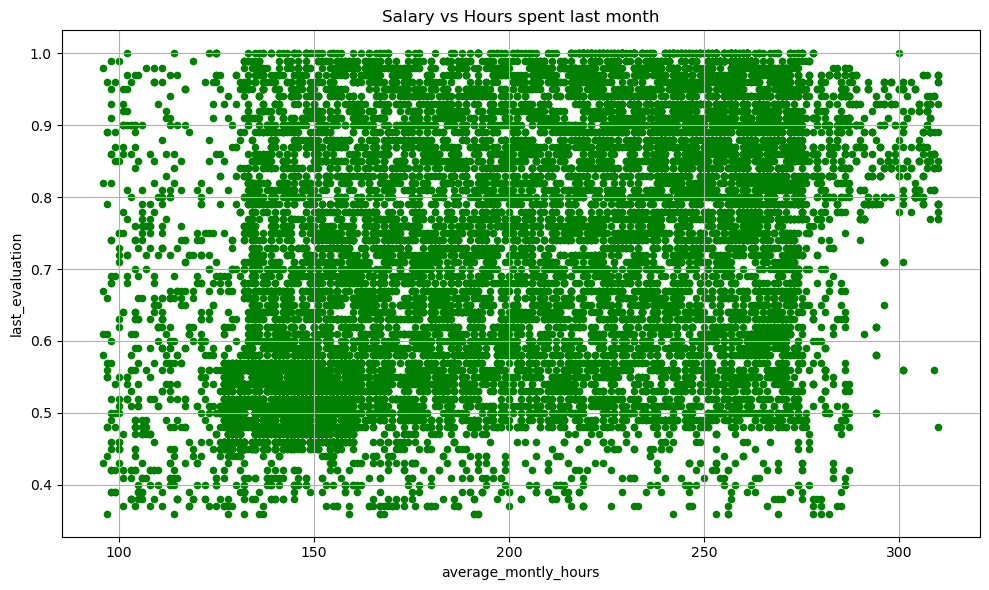

In [10]:
hr_data.plot(kind='scatter', x='average_montly_hours', y='last_evaluation', title='Salary vs Hours spent last month', color='green', figsize=(10,6))
plt.grid(True)
plt.tight_layout()
plt.show()

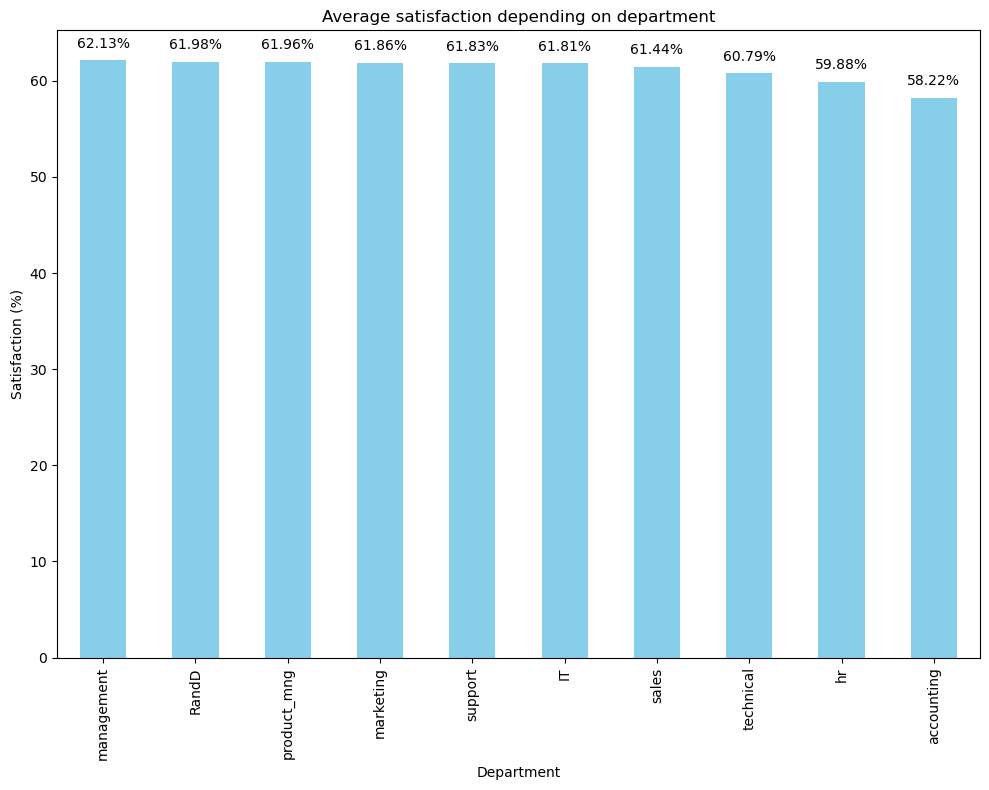

In [12]:
avg_satisfaction = hr_data.groupby("Department")["satisfaction_level"].mean() * 100
avg_satisfaction = avg_satisfaction.sort_values(ascending=False)

# Plot
ax = avg_satisfaction.plot(kind='bar', figsize=(10, 8), title='Average satisfaction depending on department', color='skyblue')
plt.ylabel('Satisfaction (%)')

for i, value in enumerate(avg_satisfaction):
    ax.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

if 'left' == True:
    hr_data.dropna(how = 'any', inplace = True)
    

plt.tight_layout()
plt.show()

# Satisfaction Level vs Last Evaluation

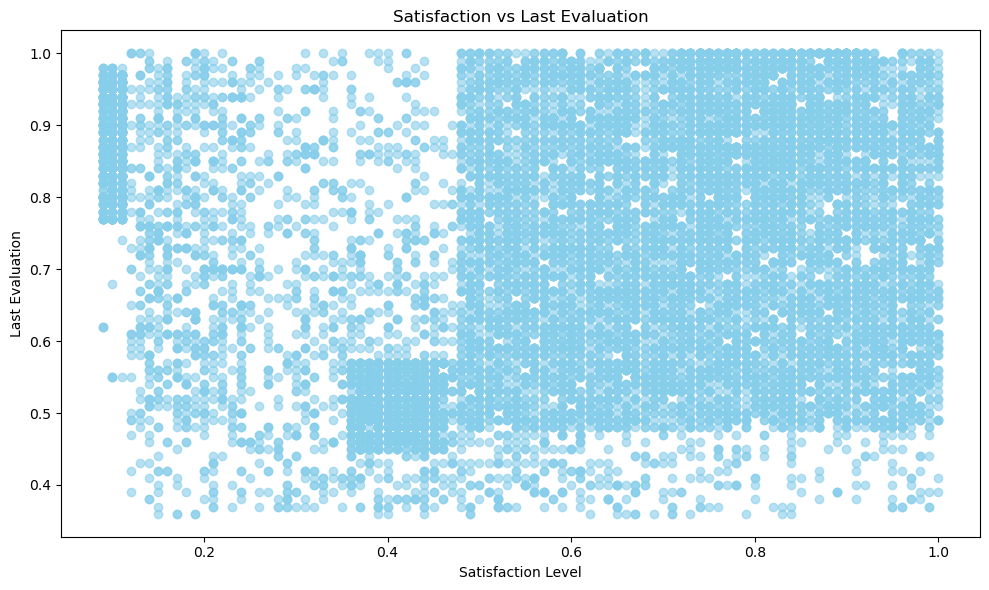

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(hr_data['satisfaction_level'], hr_data['last_evaluation'], alpha=0.6, color='skyblue')
plt.title('Satisfaction vs Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.tight_layout()
plt.show()

# Distribution of Satisfaction Levels
- Histogram, kolla generell nöjdhet

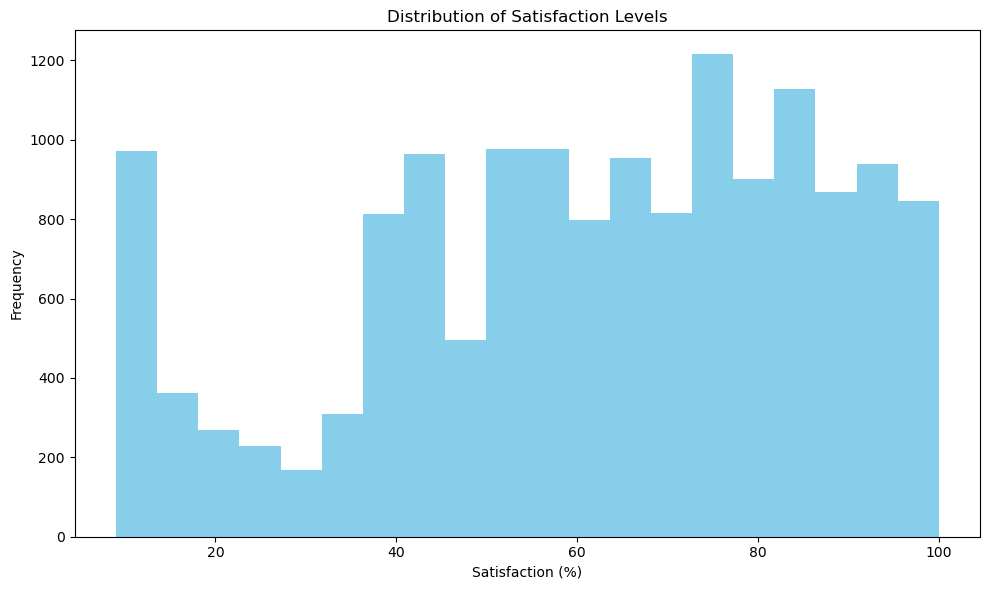

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(hr_data['satisfaction_level'] * 100, bins=20, color='skyblue')
plt.title('Distribution of Satisfaction Levels')
plt.xlabel('Satisfaction (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Avrage monthly hours by department
- bar plot, jämföra snitt timmar per department

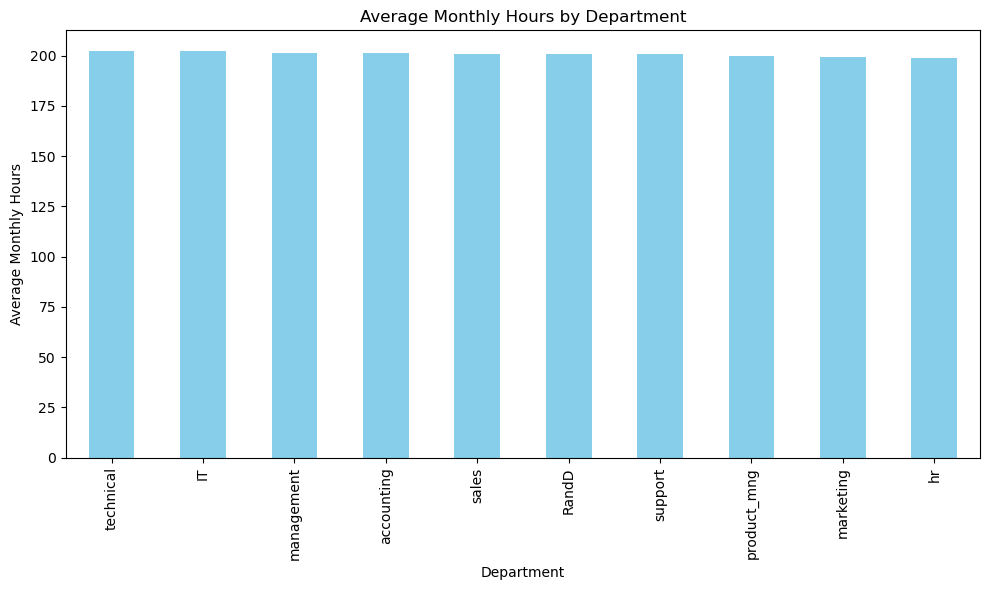

In [21]:
avg_hours = hr_data.groupby('Department')['average_montly_hours'].mean().sort_values(ascending=False)
ax = avg_hours.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Average Monthly Hours by Department')
plt.ylabel('Average Monthly Hours')
plt.tight_layout()
plt.show()

# Exitrate by Satisfaction

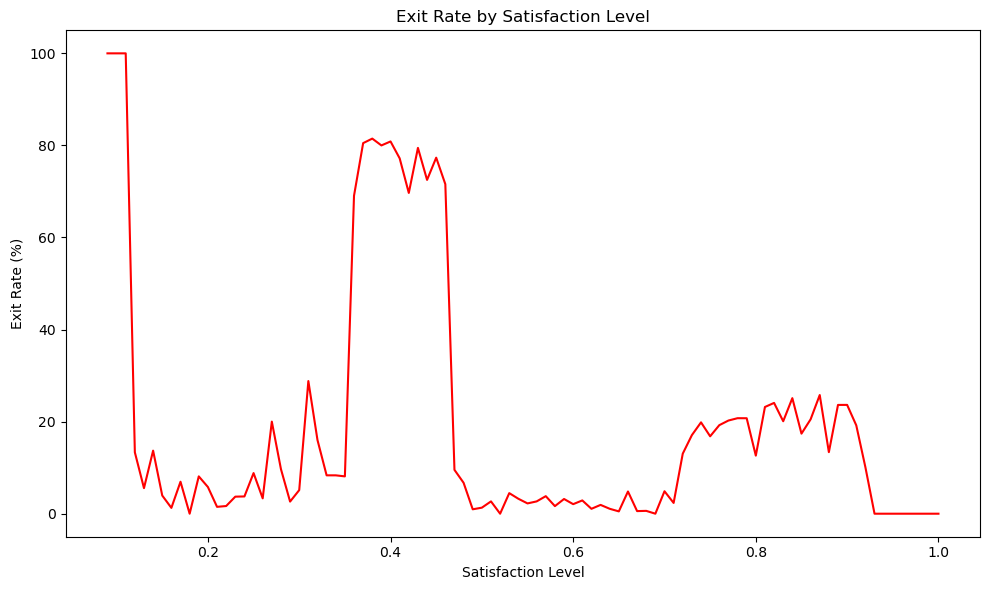

In [24]:
exit_rate = hr_data.groupby('satisfaction_level')['left'].mean() * 100
plt.figure(figsize=(10, 6))
plt.plot(exit_rate, color='red')
plt.title('Exit Rate by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Exit Rate (%)')
plt.tight_layout()
plt.show()

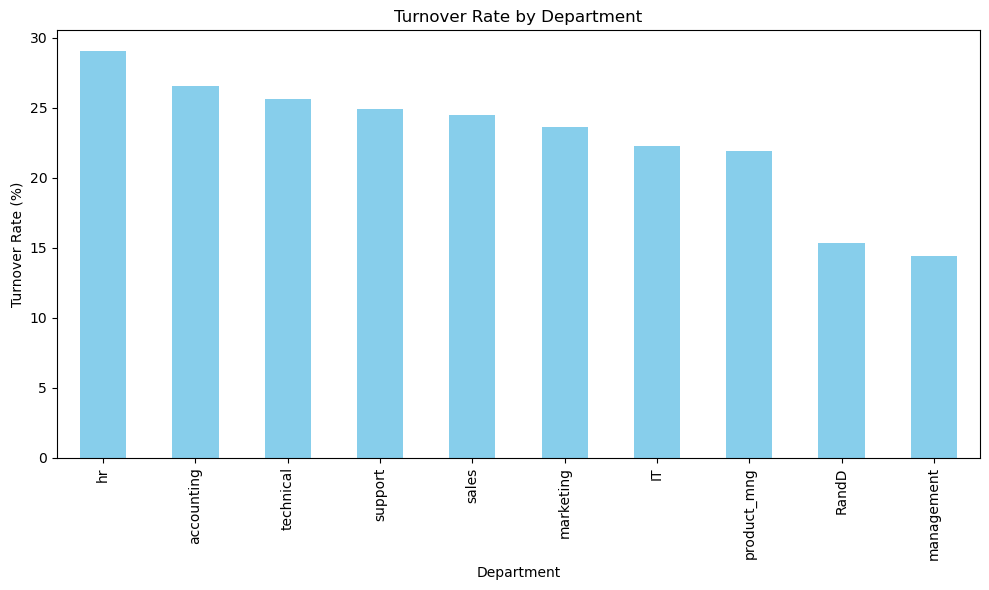

In [26]:
turnover_rate = hr_data[hr_data['left'] == 1].groupby('Department').size() / hr_data.groupby('Department').size() * 100
ax = turnover_rate.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue', title='Turnover Rate by Department')
plt.ylabel('Turnover Rate (%)')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

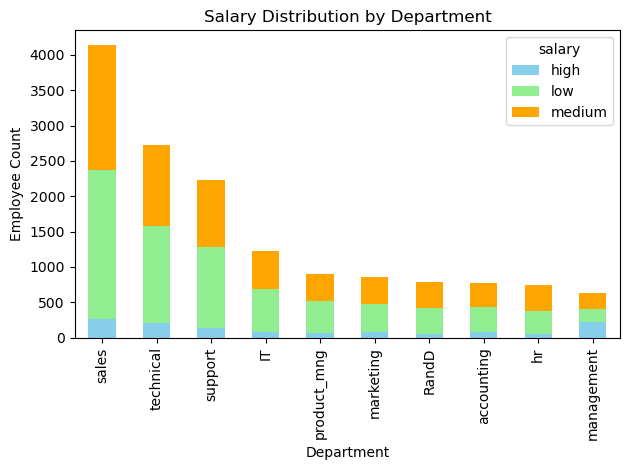

In [28]:

dept_salary_counts = hr_data.groupby(['Department', 'salary']).size().unstack(fill_value=0)

dept_salary_counts = dept_salary_counts.loc[dept_salary_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
dept_salary_counts.plot(
    kind='bar', 
    stacked=True, 
    color=['skyblue', 'lightgreen', 'orange'],
    title='Salary Distribution by Department'
)
plt.ylabel('Employee Count')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

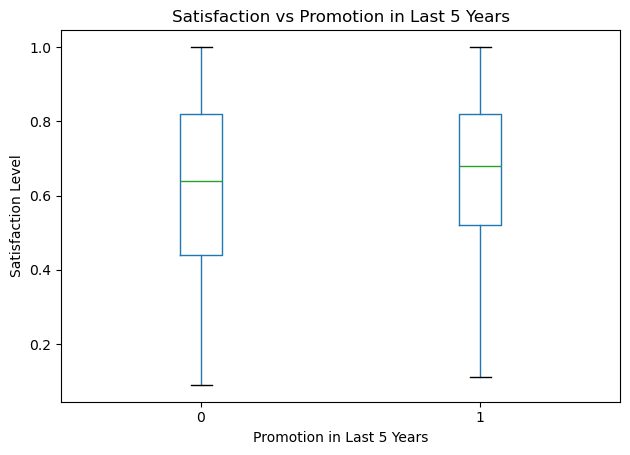

In [30]:
plt.figure(figsize=(10, 6))
hr_data.boxplot(column='satisfaction_level', by='promotion_last_5years', grid=False)
plt.title('Satisfaction vs Promotion in Last 5 Years')
plt.suptitle('')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.show()

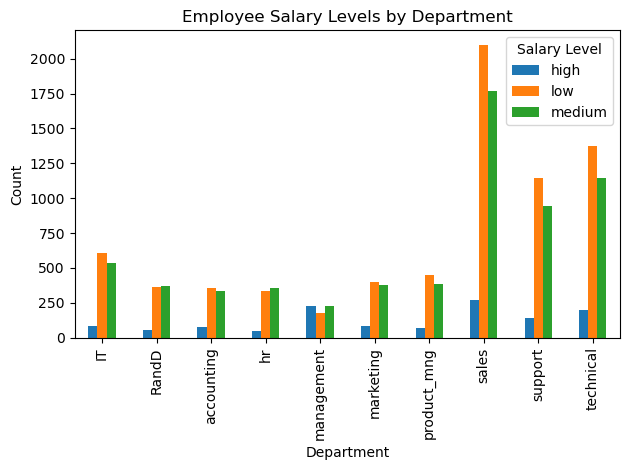

In [32]:

counts = hr_data.groupby(["Department", "salary"]).size().unstack(fill_value=0)

counts.plot(kind="bar", stacked=False)
plt.title("Employee Salary Levels by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Salary Level")
plt.tight_layout()
plt.show()


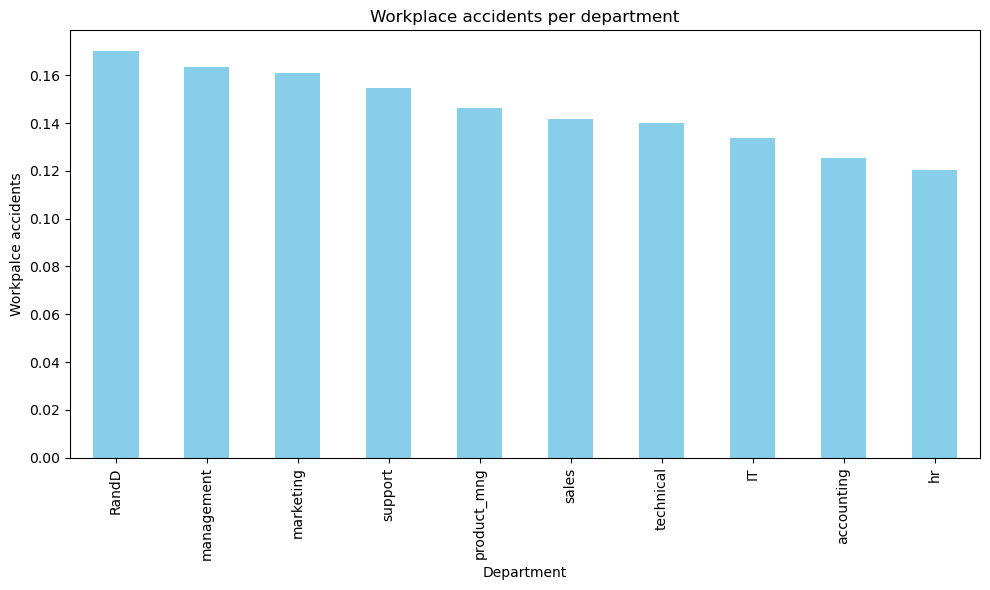

In [34]:
accidents_department = hr_data.groupby('Department')['Work_accident'].mean().sort_values(ascending=False)
ax = accidents_department.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Workplace accidents per department')
plt.ylabel('Workpalce accidents')
plt.tight_layout()
plt.show()